# Load data

In [1]:
config_name = '/home/quahb/caipi_denoising/data/results/ps256_th_varynoise_test'

%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np
import os
import sys

sys.path.insert(1, '/home/quahb/caipi_denoising/src')

from utils.data_io import load_dataset
from preparation.gen_data import get_train_data, get_test_data
from evaluation.compute_metrics import compute_metrics

dataset_folder = os.path.join('/home/quahb/caipi_denoising/data/results/', config_name)

subj_volumes = load_dataset(dataset_folder)
print(len(subj_volumes), subj_volumes.keys())
random_key = list(subj_volumes.keys())[0]
for i in subj_volumes[random_key]:
    print(i.shape)
shapes = [ subj_volumes[subj_id][0].shape for subj_id in subj_volumes.keys() ]
print(shapes)

156 dict_keys(['1_01_016-V1_CAIPI1x2', '1_01_016-V1_CAIPI1x3', '1_01_016-V1_CAIPI2x2', '1_01_018-V1_CAIPI1x2', '1_01_018-V1_CAIPI1x3', '1_01_018-V1_CAIPI2x2', '1_01_021-V1_CAIPI1x2', '1_01_021-V1_CAIPI1x3', '1_01_021-V1_CAIPI2x2', '1_01_022-V1_CAIPI1x2', '1_01_022-V1_CAIPI1x3', '1_01_022-V1_CAIPI2x2', '1_01_024-V1_CAIPI1x2', '1_01_024-V1_CAIPI1x3', '1_01_024-V1_CAIPI2x2', '1_01_026-V1_CAIPI1x2', '1_01_026-V1_CAIPI1x3', '1_01_026-V1_CAIPI2x2', '1_01_028-V1_CAIPI1x2', '1_01_028-V1_CAIPI1x3', '1_01_028-V1_CAIPI2x2', '1_01_029-V1_CAIPI1x2', '1_01_029-V1_CAIPI1x3', '1_01_029-V1_CAIPI2x2', '1_01_031-V1_CAIPI1x2', '1_01_031-V1_CAIPI1x3', '1_01_031-V1_CAIPI2x2', '1_01_032-V1_CAIPI1x2', '1_01_032-V1_CAIPI1x3', '1_01_032-V1_CAIPI2x2', '1_01_036-V1_CAIPI1x2', '1_01_036-V1_CAIPI1x3', '1_01_036-V1_CAIPI2x2', '1_01_037-V1-2_CAIPI1x2', '1_01_037-V1-2_CAIPI1x3', '1_01_037-V1-2_CAIPI2x2', '1_01_037-V1_CAIPI1x2', '1_01_037-V1_CAIPI1x3', '1_01_037-V1_CAIPI2x2', '1_01_038-V1_CAIPI1x2', '1_01_038-V1_CAIPI1

In [2]:
def plot_test_set(subj_volumes, start_i=0, plot_n=10, slc_index=128, mode='sagittal', noise_map=False):
    init_slc = 0
    n_rows, n_cols = plot_n, 2
    
    if noise_map: n_cols = 3

    figure, axis = plt.subplots(n_rows, n_cols, figsize=(n_cols * 8, n_rows * 10))
    print('Plotting {}/{} slices...'.format(n_rows, len(subj_volumes.keys())))
    for i, subj_id in enumerate(list(subj_volumes.keys())[start_i:start_i + n_rows]):
        acc_vol, denoised_vol = subj_volumes[subj_id]
        
        acc_vol = acc_vol.astype(np.float64)
        denoised_vol = denoised_vol.astype(np.float64)
        noise_vol = np.subtract(acc_vol, denoised_vol)
        
        acc_min, acc_max, acc_mean, acc_std         = np.min(acc_vol),      np.max(acc_vol),      np.mean(acc_vol),      np.std(acc_vol)
        den_min, den_max, den_mean, den_std         = np.min(denoised_vol), np.max(denoised_vol), np.mean(denoised_vol), np.std(denoised_vol)
        noise_min, noise_max, noise_mean, noise_std = np.min(noise_vol),    np.max(noise_vol),    np.mean(noise_vol),    np.std(noise_vol)
        
        if mode == 'sagittal':
            acc_slc      = acc_vol[:,:,slc_index]
            denoised_slc = denoised_vol[:,:,slc_index]
            noise_slc    = noise_vol[:,:,slc_index]
        elif mode == 'axial':
            acc_slc      = acc_vol[slc_index,:,:]
            denoised_slc = denoised_vol[slc_index,:,:]
            noise_slc    = noise_vol[slc_index,:,:]
        elif mode == 'coronal':
            acc_slc      = acc_vol[:,slc_index,:]
            denoised_slc = denoised_vol[:,slc_index,:]
            noise_slc    = noise_vol[:,slc_index,:]


        axis[i, 0].imshow(acc_slc, cmap='gray')
        axis[i, 0].set_title('{}, Slice: {}'.format(subj_id, slc_index))
        axis[i, 0].set(xlabel='min: {:.3f}, max: {:.3f}, mean: {:.3f}, std: {:.3f}'.format(
            acc_min, acc_max, acc_mean, acc_std))
        
        axis[i, 1].imshow(denoised_slc, cmap='gray')
        axis[i, 1].set_title('Denoised')
        axis[i, 1].set(xlabel='min: {:.3f}, max: {:.3f}, mean: {:.3f}, std: {:.3f}'.format(
            den_min, den_max, den_mean, den_std))
        
        if noise_map:
            axis[i, 2].imshow(noise_slc, cmap='gray')
            axis[i, 2].set_title('Noise Map')
            axis[i, 2].set(xlabel='min: {:.3f}, max: {:.3f}, mean: {:.3f}, std: {:.3f}'.format(
                noise_min, noise_max, noise_mean, noise_std))
        
        init_slc += 1
        
    plt.show()
    

# Plot slices

Plotting 5/156 slices...


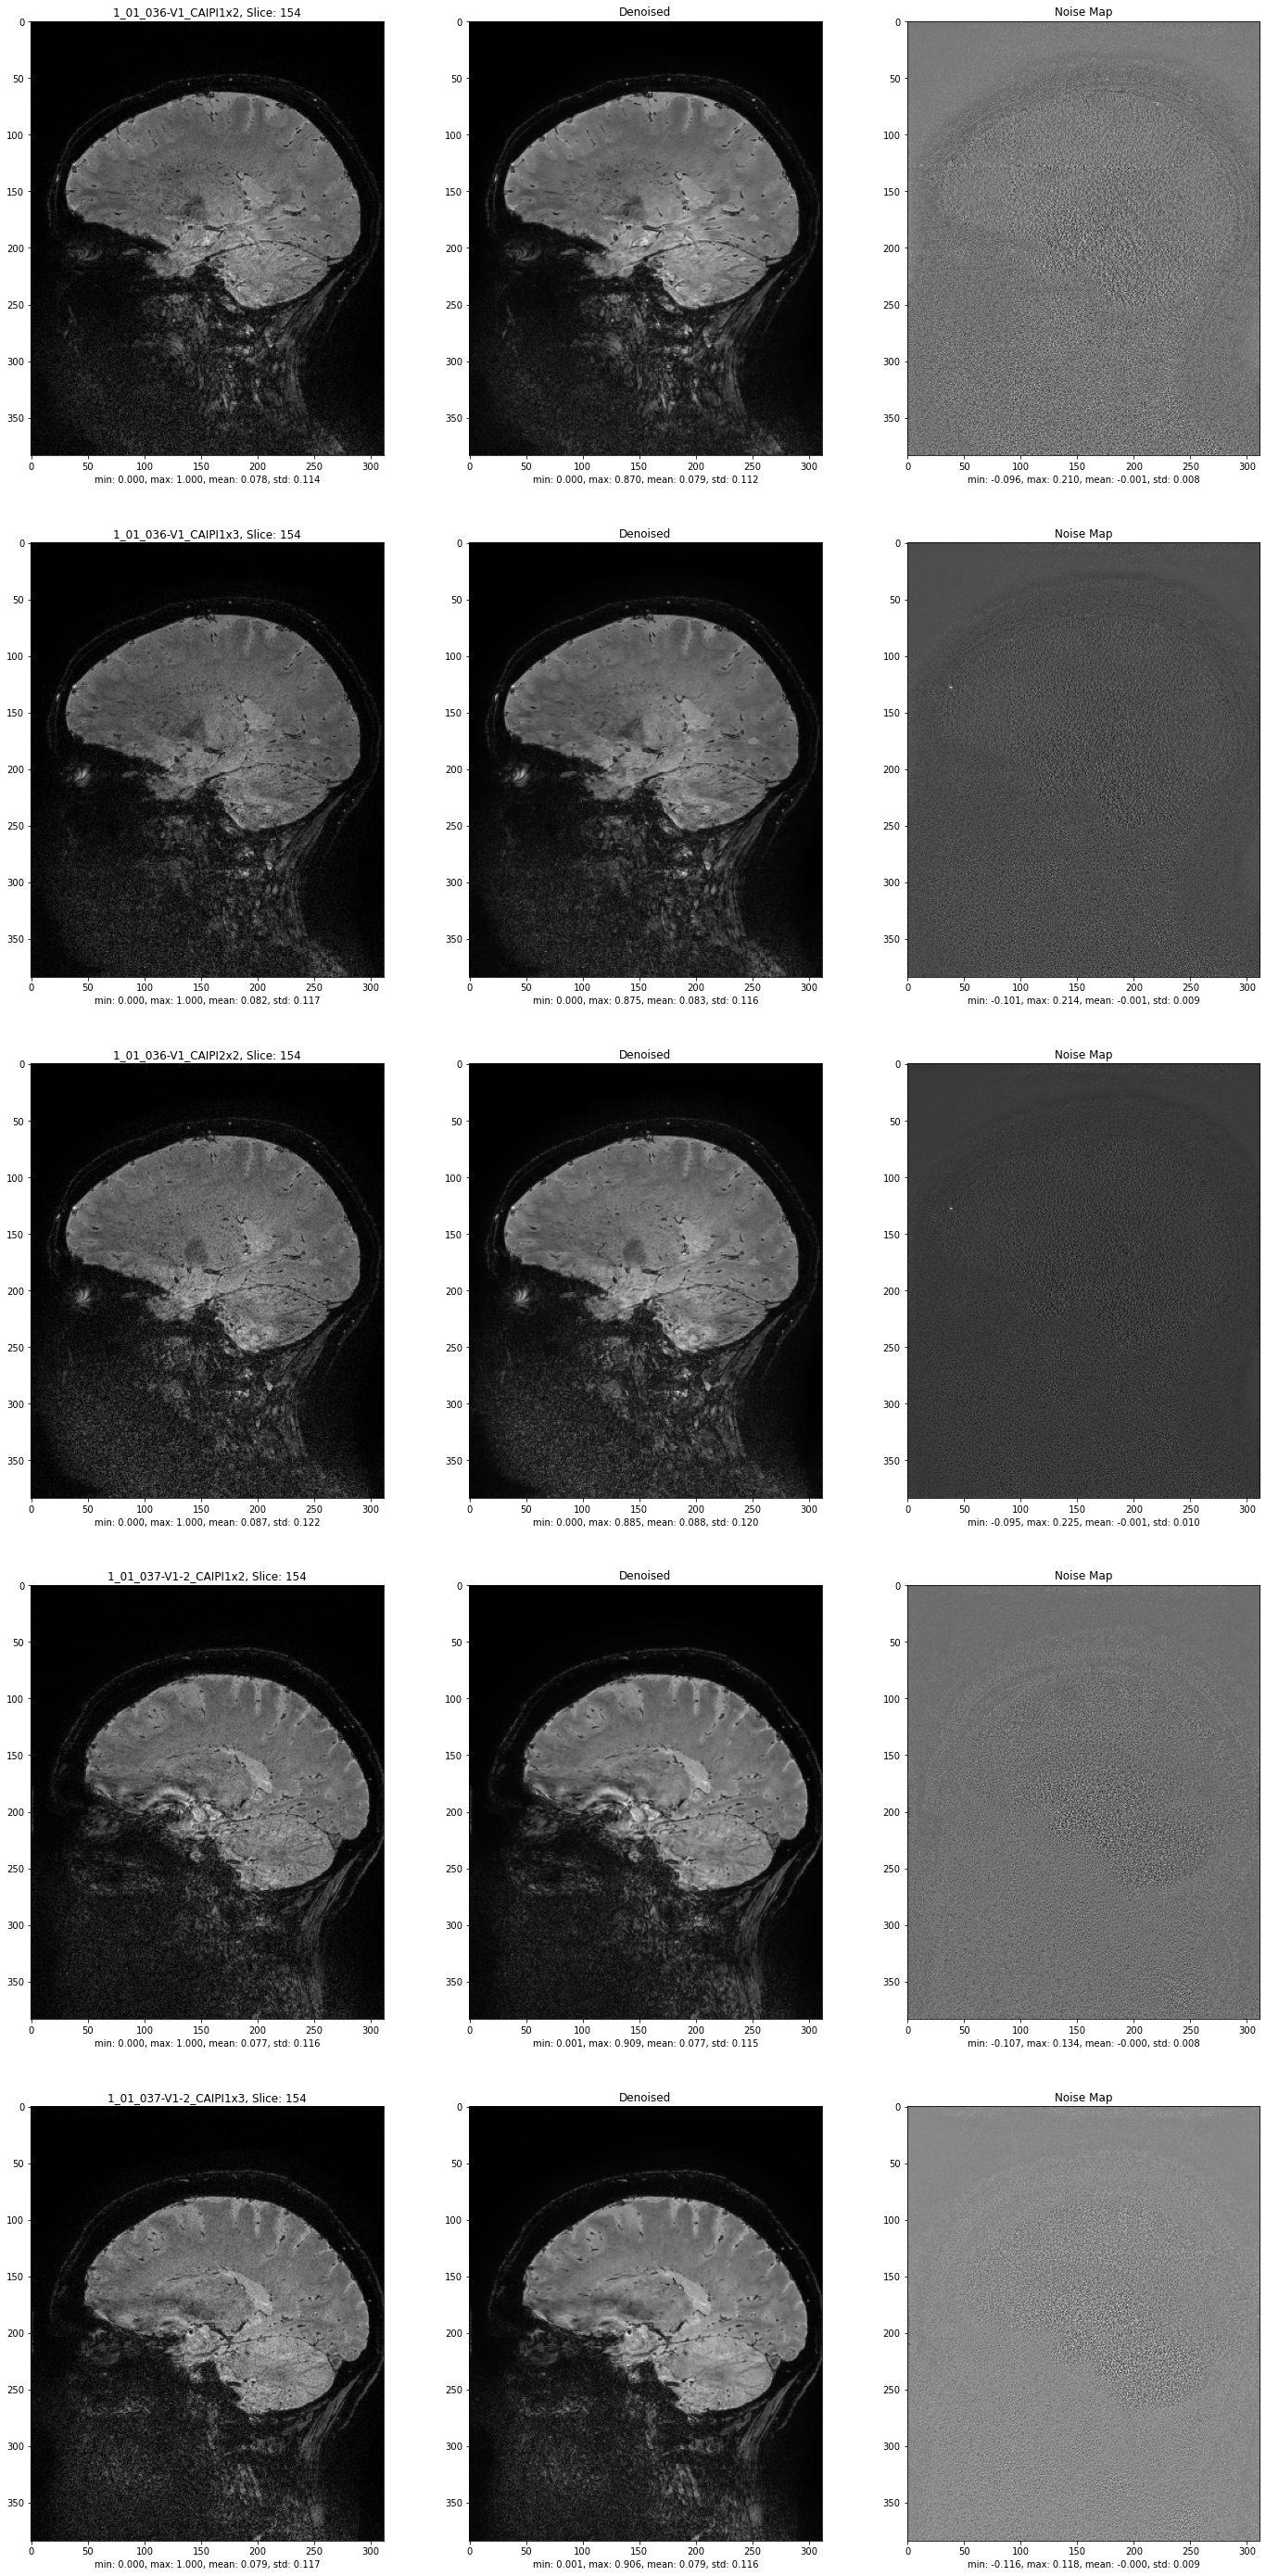

In [25]:
view_mode='sagittal'
slc_index=154

plot_test_set(subj_volumes, start_i=30, plot_n=5, slc_index=slc_index, mode=view_mode, noise_map=True)

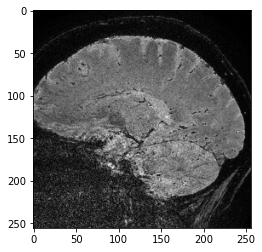

In [24]:
plt.imshow(subj_volumes['1_01_037-V1-2_CAIPI2x2'][0][50:50+256,50:50+256,154],cmap='gray')

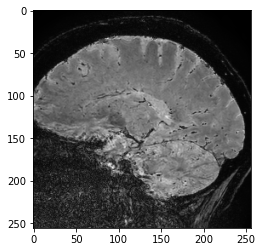

In [23]:
plt.imshow(subj_volumes['1_01_037-V1-2_CAIPI2x2'][1][50:50+256,50:50+256,154],cmap='gray')

# Histogram Plot

In [4]:
print(random_key)
random_key = '1_01_020-V1_CAIPI1x2'
image = subj_volumes[random_key][1][128,:,:]
print(np.mean(image))
histogram, bin_edges = np.histogram(image, bins=500, range=(np.min(image), np.max(image)))
print(len(histogram), len(bin_edges))
plt.figure()
plt.title(random_key)
plt.xlabel("grayscale value")
plt.ylabel("pixel count")
plt.xlim([np.min(image), np.max(image)])

plt.plot(bin_edges[0:-1], histogram)
plt.show()

1_01_016-V1_CAIPI1x2


KeyError: '1_01_020-V1_CAIPI1x2'

In [ ]:
print(random_key)
random_key = '1_01_020-V1_CAIPI1x2'
image = subj_volumes[random_key][1][230,:,:]
print(np.mean(image))
histogram, bin_edges = np.histogram(image, bins=256, range=(np.min(image), np.max(image)))

plt.figure()
plt.title(random_key)
plt.xlabel("grayscale value")
plt.ylabel("pixel count")
plt.xlim([np.min(image), np.max(image)])

plt.plot(bin_edges[0:-1], histogram)
plt.show()

In [ ]:
print(random_key)
random_key = random_key
image = subj_volumes[random_key][1][:,:,:]
plt.figure(figsize=(10,10))
plt.imshow(image[128,:,:], cmap='gray')
print(image.shape)
slc_means = []
for slc_i in range(len(image)):
    histogram, bin_edges = np.histogram(image[slc_i], bins=500, range=(np.min(image[slc_i]), np.max(image[slc_i])))
    avg_bins = []
    for bin_i in range(0, len(bin_edges) - 1):
        avg_bins.append( (bin_edges[bin_i] + bin_edges[bin_i + 1]) / 2 )
        
    slc_means.append( sum([ freq * bin_val for freq, bin_val in zip(histogram, avg_bins) ]) / 500 )


new_im = np.copy(image)

for slc_i in range(1, len(new_im)):
    new_im[slc_i] = new_im[slc_i] + slc_means[slc_i] - slc_means[slc_i - 1]


plt.figure(figsize=(10,10))
plt.imshow(new_im[128,:,:], cmap='gray')